In [1]:
## Title : Pourcentage of cell expressing a gene per Epithelial cell types 
## Author : Eulalie Liorzou 

# LOAD LIBRARIES
library(Seurat)
library(SeuratDisk)
library(SeuratOb)

library(SingleR)
library(scuttle)
library(tidyverse)
library(dplyr)
library(purrr)
library(ggpubr)
library(ggh4x)

## Custom theme 
# SET CUSTOM THEME
theme_custom = theme(plot.title = element_text(face="bold", 
                                               size = 20,
                                               margin = 20), 
                     axis.title = element_text(face ="plain",
                                               size = 15, 
                                               margin = 5),
                     axis.text = element_text(face = "plain", 
                                              size = 12, 
                                              angle = 45, hjust = 1),
                     strip.text = element_text(face = "plain", 
                                               size = 12),
                    panel.grid.minor = element_blank(), 
                    panel.grid.major = element_blank())



Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowA

In [2]:
## Extract the proportion of cells for LIF

for (species in c("Macaque","Marmoset","MousePseudopregnant", "Human")) {
  
  if (species =="MousePseudopregnant" | species =="Mouse") {
    gene = "Lif"
    name = species
    sobj = readRDS(file = paste0("../../../results/snRNA-seq/seuratobject/",species,"_processed.rds"))
    DefaultAssay(object = sobj) = "RNA"
    
    # Collecting normalised LIF expression for each cell
    sobj$LIF_expression = FetchData(sobj, vars = gene, slot = "data")
    
  } else {
    gene = "LIF" 
    name = species
    sobj = readRDS(file = paste0("../../../results/snRNA-seq/seuratobject/",species,"_processed.rds"))
    DefaultAssay(object = sobj) = "RNA"
    
    # Collecting normalised LIF expression for each cell
    sobj$LIF_expression = FetchData(sobj, vars = gene, slot = "data")
  }
    # Compute the proportion of cells per cluster expression LIF
    LIF_PropCluster = sobj@meta.data %>%  
      mutate(LIF = ifelse(sobj$LIF_expression > 0, "yes", "no")) %>% 
      group_by(Manual_annotation, LIF) %>% 
      summarise(n = n()) %>% 
      group_by(Manual_annotation) %>%
      mutate(prop = n/sum(n)) %>%
      mutate(Species = name)
    assign(paste0(name, "_LIF_Proportion"),LIF_PropCluster)
}    

 

Warning message:
“The `slot` argument of `FetchData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.”
`summarise()` has grouped output by 'Manual_annotation'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'Manual_annotation'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'Manual_annotation'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'Manual_annotation'. You can override using
the `.groups` argument.


In [3]:
ls()
Marmoset_LIF_Proportion

[1] "gene"                               "Human_LIF_Proportion"              
 [3] "LIF_PropCluster"                    "Macaque_LIF_Proportion"            
 [5] "Marmoset_LIF_Proportion"            "MousePseudopregnant_LIF_Proportion"
 [7] "name"                               "sobj"                              
 [9] "species"                            "theme_custom"

Manual_annotation              LIF n    prop        
AAACCCAAGGCCATAG-1 Epithelial_Glandular_Secretory no  4987 0.9885034688
AAAGTGAGTGGGTCAA-1 Epithelial_Glandular_Secretory yes   58 0.0114965312
AAACCCACAAAGGGTC-1 Stromal                        no  2285 0.9991254919
AGGGCCTAGGTAGACC-1 Stromal                        yes    2 0.0008745081
AAACCCAAGCCTCATA-1 Epithelial_Luminal             no  1065 0.9833795014
AACGTCATCTGCTGAA-1 Epithelial_Luminal             yes   18 0.0166204986
AAACCCAGTGTCTAAC-1 Immune                         no   357 0.9944289694
GGCTGTGAGGAAAGAC-1 Immune                         yes    2 0.0055710306
AAACGCTAGAGGTTTA-1 Myometrium                     no   323 1.0000000000
AAAGGTACATCGCTAA-1 Endothelial                    no   126 0.9921259843
ACGGGTCTCCATCTAT-1 Endothelial                    yes    1 0.0078740157
AAGTACCTCAGACTGT-1 Epithelial_Ciliated            no    73 1.0000000000
                   Species 
AAACCCAAGGCCATAG-1 Marmoset
AAAGTGAGTGGGTCAA-1 Marmoset
AAACCCACAAAGGGTC-1 Marmoset
AGGGCCTAGGTAGACC-1 Marmoset
AAACCCAAGCCTCATA-1 Marmoset
AACGTCATCTGCTGAA-1 Marmoset
AAACCCAGTGTCTAAC-1 Marmoset
GGCTGTGAGGAAAGAC-1 Marmoset
AAACGCTAGAGGTTTA-1 Marmoset
AAAGGTACATCGCTAA-1 Marmoset
ACGGGTCTCCATCTAT-1 Marmoset
AAGTACCTCAGACTGT-1 Marmoset

In [4]:

LIF_proportion = rbind(Human_LIF_Proportion, MousePseudopregnant_LIF_Proportion, Macaque_LIF_Proportion, Marmoset_LIF_Proportion) %>% 
    filter(Manual_annotation != "Stromal" & Manual_annotation != "Lymphoid" & Manual_annotation != "Stromal_Perivascular" & Manual_annotation != "Myometrial" & Manual_annotation != "MUC5B" &  Manual_annotation != "Myeloid" &   Manual_annotation != "Immune" & Manual_annotation != "Myometrium" & Manual_annotation != "Endothelial" )
  
# filter(Manual_annotation != "Stromal" | Manual_annotation != "Epithelial Glandular-Secretory" | Manual_annotation == "Epithelial Ciliated" | Manual_annotation == "Epithelial proliferating" |Manual_annotation == "Epithelial_Glandular" | Manual_annotation == "Epithelial_Luminal" |Manual_annotation == "Epithelial_glandular" | Manual_annotation == "Epithelial_luminal" | Manual_annotation=="Epithelial_precursors" | Manual_annotation =="Epithelial_Proliferating")
LIF_proportion$Manual_annotation = str_replace(LIF_proportion$Manual_annotation, "_", " ")
LIF_proportion$LIF = as.factor(LIF_proportion$LIF)
LIF_proportion$Manual_annotation = str_remove(LIF_proportion$Manual_annotation, "Epithelial ")
LIF_proportion$Manual_annotation = str_remove(LIF_proportion$Manual_annotation, "-Secretory")
LIF_proportion$Manual_annotation = str_replace(string = LIF_proportion$Manual_annotation, pattern = "proliferating", replacement = "Proliferating")


In [5]:
LIF_proportion

Manual_annotation   LIF n    prop       
UA_Endo12269810_TTCTAACAGCCTTTGA Glandular_Secretory no  2079 0.917880795
UA_Endo12269810_GTCACGGTCATGGATC Glandular_Secretory yes  186 0.082119205
UA_Endo12604667_CACTGGGCATAGTCGT Precursors          no  1445 0.993810179
UA_Endo12604667_AGACTCACAGATCATC Precursors          yes    9 0.006189821
UA_Endo12604667_CATTCTAGTTGCCATA Luminal             no   678 0.992679356
UA_Endo12604667_TGGGAGAAGCTCGGCT Luminal             yes    5 0.007320644
UA_Endo11173482_AGTCACAGTAGTCCTA Ciliated            no    88 0.956521739
UA_Endo12296824_GATCATGAGCTCACTA Ciliated            yes    4 0.043478261
AAACGAAAGACCATTC-1_1             Luminal             no  2913 0.978501847
AAGACTCTCATCTACT-1_1             Luminal             yes   64 0.021498153
AAACCCAGTATCACCA-1_1             Glandular_Secretory no  2223 0.792513369
AAACGCTAGTTAGTGA-1_1             Glandular_Secretory yes  582 0.207486631
AAACAGCCATGAGTTT-1               Glandular           no  2390 1.000000000
AAACGGATCTCAATTC-1               Cycling             no   530 1.000000000
CATAATCCATCCTAGA-1               Ciliated            no    10 1.000000000
AAACCCAAGGCCATAG-1               Glandular_Secretory no  4987 0.988503469
AAAGTGAGTGGGTCAA-1               Glandular_Secretory yes   58 0.011496531
AAACCCAAGCCTCATA-1               Luminal             no  1065 0.983379501
AACGTCATCTGCTGAA-1               Luminal             yes   18 0.016620499
AAGTACCTCAGACTGT-1               Ciliated            no    73 1.000000000
                                 Species            
UA_Endo12269810_TTCTAACAGCCTTTGA Human              
UA_Endo12269810_GTCACGGTCATGGATC Human              
UA_Endo12604667_CACTGGGCATAGTCGT Human              
UA_Endo12604667_AGACTCACAGATCATC Human              
UA_Endo12604667_CATTCTAGTTGCCATA Human              
UA_Endo12604667_TGGGAGAAGCTCGGCT Human              
UA_Endo11173482_AGTCACAGTAGTCCTA Human              
UA_Endo12296824_GATCATGAGCTCACTA Human              
AAACGAAAGACCATTC-1_1             MousePseudopregnant
AAGACTCTCATCTACT-1_1             MousePseudopregnant
AAACCCAGTATCACCA-1_1             MousePseudopregnant
AAACGCTAGTTAGTGA-1_1             MousePseudopregnant
AAACAGCCATGAGTTT-1               Macaque            
AAACGGATCTCAATTC-1               Macaque            
CATAATCCATCCTAGA-1               Macaque            
AAACCCAAGGCCATAG-1               Marmoset           
AAAGTGAGTGGGTCAA-1               Marmoset           
AAACCCAAGCCTCATA-1               Marmoset           
AACGTCATCTGCTGAA-1               Marmoset           
AAGTACCTCAGACTGT-1               Marmoset

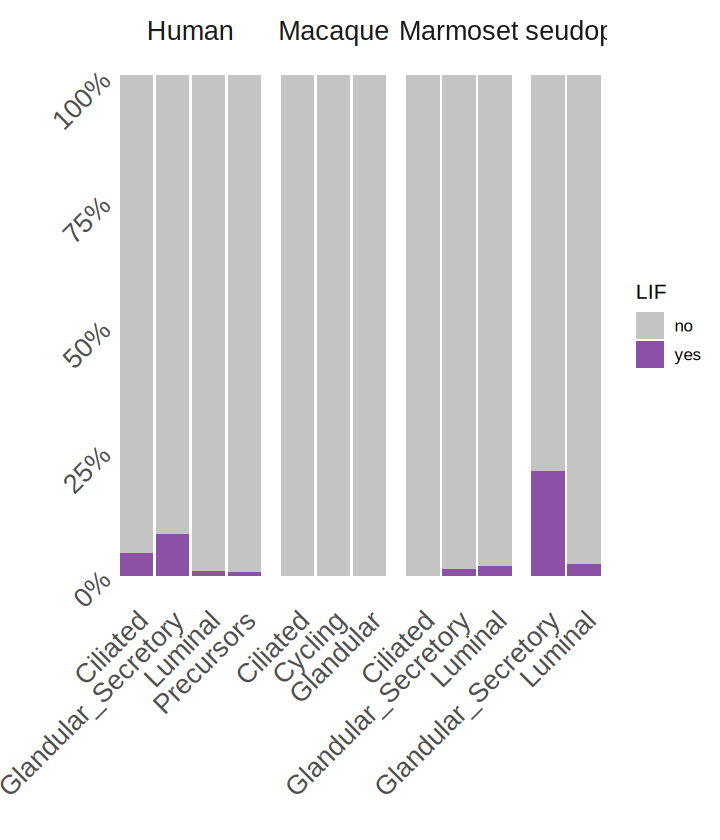

In [6]:
options(repr.plot.width=6, repr.plot.height=7)

# Save the table 
write.table(LIF_proportion, file = "../../../results/snRNA-seq/Proportion_EpithelialCell_Expressing_LIF_withMousePseudopregnant_v4.tab", sep = "\t")

# Stalked barplot 
ggplot(LIF_proportion, mapping = aes(x = Manual_annotation, y = prop, fill =  LIF)) + 
  geom_bar(position= "stack", stat = "identity") +
  facet_grid(~ Species, scales = "free_x", space = "free") + #, scales = "free_x" 
  scale_fill_manual(values = c("grey77","#8A51A4")) + 
  scale_y_continuous(labels = scales::percent) +
  labs(y="", x="") + 
  theme_minimal(base_size = 12) +
  theme(plot.title = element_text(face="bold", 
                                                 size = 16,
                                                 margin = 20), 
                       axis.title = element_text(face ="plain",
                                                 size = 16, 
                                                 margin = 5),
                       axis.text = element_text(face = "plain", 
                                                size = 16, 
                                                angle = 45, hjust = 1),
                       strip.text = element_text(face = "plain", 
                                                 size = 16),
                       panel.grid.minor = element_blank(), 
                       panel.grid.major = element_blank())
  
  ggsave("../../../figures/pieces/LIF_prop_by_cluster_min0_VF.pdf", width = 6, height = 7)

  
 

In [2]:

  #--------------------------------------------
  # B4GALNT2 
  ## Extract the proportion of cells 
  
  for (species in c("Macaque","Marmoset","MousePseudopregnant", "Human")) {
    
    if (species =="MousePseudopregnant" | species == "Mouse") {
      gene = "B4galnt2"
      name = species
      sobj = readRDS(file = paste0("../../../results/snRNA-seq/seuratobject/",species,"_processed.rds"))
      DefaultAssay(object = sobj) = "RNA"
      
      # Collecting normalised B4GALNT2 expression for each cell
      sobj$B4GALNT2_expression = FetchData(sobj, vars = gene, slot = "data")
      
    } else {
      gene = "B4GALNT2" 
      name = species
      sobj = readRDS(file = paste0("../../../results/snRNA-seq/seuratobject/",species,"_processed.rds"))
      DefaultAssay(object = sobj) = "RNA"
      
      # Collecting normalised B4GALNT2 expression for each cell
      sobj$B4GALNT2_expression = FetchData(sobj, vars = gene, slot = "data")
    }
    # Compute the proportion of cells per cluster expression B4GALNT2
    B4GALNT2_PropCluster = sobj@meta.data %>%  
      mutate(B4GALNT2 = ifelse(sobj$B4GALNT2_expression > 0, "yes", "no")) %>% 
      group_by(Manual_annotation, B4GALNT2) %>% 
      summarise(n = n()) %>% 
      group_by(Manual_annotation) %>%
      mutate(prop = n/sum(n)) %>%
      mutate(Species = name)
    assign(paste0(name, "_B4GALNT2_Proportion"),B4GALNT2_PropCluster)
  }    
  
B4GALNT2_proportion = rbind(Human_B4GALNT2_Proportion, MousePseudopregnant_B4GALNT2_Proportion, Macaque_B4GALNT2_Proportion, Marmoset_B4GALNT2_Proportion)%>% 
    filter(Manual_annotation != "Stromal" & Manual_annotation != "Lymphoid" & Manual_annotation != "Myometrial" & Manual_annotation != "MUC5B" &  Manual_annotation != "Myeloid" &   Manual_annotation != "Immune" & Manual_annotation != "Myometrium" & Manual_annotation != "Endothelial" )

#   filter(Manual_annotation == "Epithelial Luminal" | Manual_annotation == "Epithelial Glandular-Secretory" | Manual_annotation == "Epithelial Ciliated" | Manual_annotation == "Epithelial proliferating" |Manual_annotation == "Epithelial_Glandular" | Manual_annotation == "Epithelial_Luminal" |Manual_annotation == "Epithelial_glandular" | Manual_annotation == "Epithelial_luminal" | Manual_annotation=="Epithelial_precursors" )
B4GALNT2_proportion$Manual_annotation = str_replace(B4GALNT2_proportion$Manual_annotation, "_", " ")
B4GALNT2_proportion$B4GALNT2 = as.factor(B4GALNT2_proportion$B4GALNT2)
B4GALNT2_proportion$Manual_annotation = str_remove(B4GALNT2_proportion$Manual_annotation, "Epithelial ")
B4GALNT2_proportion$Manual_annotation = str_remove(B4GALNT2_proportion$Manual_annotation, "-Secretory")
B4GALNT2_proportion$Manual_annotation = str_replace(string = B4GALNT2_proportion$Manual_annotation, pattern = "proliferating", replacement = "Proliferating")

# Save the table 
write.table(B4GALNT2_proportion, file = "../../../results/snRNA-seq/Proportion_EpithelialCell_Expressing_B4GALNT2_MousePseudopregnant_v4.tab", sep = "\t")


Warning message:
“The `slot` argument of `FetchData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.”
`summarise()` has grouped output by 'Manual_annotation'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'Manual_annotation'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'Manual_annotation'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'Manual_annotation'. You can override using
the `.groups` argument.


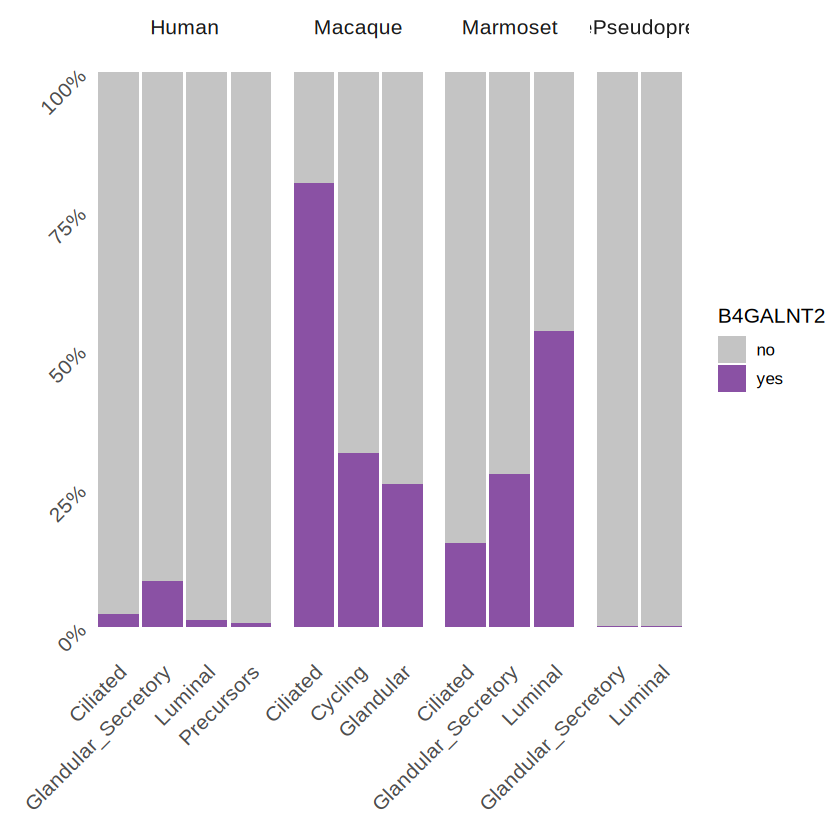

In [4]:
 
  # Stalked barplot 
  ggplot(B4GALNT2_proportion, mapping = aes(x = Manual_annotation, y = prop, fill =  B4GALNT2)) + 
    geom_bar(position= "stack", stat = "identity") +
    facet_grid(~ Species,scales = "free_x", space = "free") + #, scales = "free_x" 
    scale_fill_manual(values = c("grey77","#8A51A4")) + 
    scale_y_continuous(labels = scales::percent) +
    labs(y="", x="") + 
    theme_minimal(base_size = 12) +
    theme(plot.title = element_text(face="bold", 
                                    size = 12,
                                    margin = 20), 
          axis.title = element_text(face ="plain",
                                    size = 12, 
                                    margin = 5),
          axis.text = element_text(face = "plain", 
                                   size = 12, 
                                   angle = 45, hjust = 1),
          strip.text = element_text(face = "plain", 
                                    size = 12),
          panel.grid.minor = element_blank(), 
          panel.grid.major = element_blank())
  
  ggsave("../../../figures/pieces/B4GALNT2_prop_by_cluster_min0_MousePseudopregnant_v4.pdf", width = 6, height = 7)
  

In [12]:
  #--------------------------------------------
  # LAMC2 
  ## Extract the proportion of cells 
  
  for (species in c("Macaque","Marmoset","MousePseudopregnant", "Human")) {
    
    if (species =="MousePseudopregnant" | species == "Mouse") {
      gene = "Lamc2"
      name = species
      sobj = readRDS(file = paste0("../../../results/snRNA-seq/seuratobject/",species,"_processed.rds"))
      DefaultAssay(object = sobj) = "RNA"
      
      # Collecting normalised LAMC2 expression for each cell
      sobj$LAMC2_expression = FetchData(sobj, vars = gene, slot = "data")
      
    } else {
      gene = "LAMC2" 
      name = species
      sobj = readRDS(file = paste0("../../../results/snRNA-seq/seuratobject/",species,"_processed.rds"))
      DefaultAssay(object = sobj) = "RNA"
      
      # Collecting normalised LAMC2 expression for each cell
      sobj$LAMC2_expression = FetchData(sobj, vars = gene, slot = "data")
    }
    # Compute the proportion of cells per cluster expression LAMC2
    LAMC2_PropCluster = sobj@meta.data %>%  
      mutate(LAMC2 = ifelse(sobj$LAMC2_expression > 0, "yes", "no")) %>% 
      group_by(Manual_annotation, LAMC2) %>% 
      summarise(n = n()) %>% 
      group_by(Manual_annotation) %>%
      mutate(prop = n/sum(n)) %>%
      mutate(Species = name)
    assign(paste0(name, "_LAMC2_Proportion"),LAMC2_PropCluster)
  }    
  
LAMC2_proportion = rbind(Human_LAMC2_Proportion, MousePseudopregnant_LAMC2_Proportion, Macaque_LAMC2_Proportion, Marmoset_LAMC2_Proportion)%>% 
    filter(Manual_annotation != "Stromal" & Manual_annotation != "Lymphoid" & Manual_annotation != "Myometrial" & Manual_annotation != "MUC5B" &  Manual_annotation != "Myeloid" &   Manual_annotation != "Immune" & Manual_annotation != "Myometrium" & Manual_annotation != "Endothelial" )

#   filter(Manual_annotation == "Epithelial Luminal" | Manual_annotation == "Epithelial Glandular-Secretory" | Manual_annotation == "Epithelial Ciliated" | Manual_annotation == "Epithelial proliferating" |Manual_annotation == "Epithelial_Glandular" | Manual_annotation == "Epithelial_Luminal" |Manual_annotation == "Epithelial_glandular" | Manual_annotation == "Epithelial_luminal" | Manual_annotation=="Epithelial_precursors" )
LAMC2_proportion$Manual_annotation = str_replace(LAMC2_proportion$Manual_annotation, "_", " ")
LAMC2_proportion$LAMC2 = as.factor(LAMC2_proportion$LAMC2)
LAMC2_proportion$Manual_annotation = str_remove(LAMC2_proportion$Manual_annotation, "Epithelial ")
LAMC2_proportion$Manual_annotation = str_remove(LAMC2_proportion$Manual_annotation, "-Secretory")
LAMC2_proportion$Manual_annotation = str_replace(string = LAMC2_proportion$Manual_annotation, pattern = "proliferating", replacement = "Proliferating")

# Save the table 
write.table(LAMC2_proportion, file = "../../../results/snRNA-seq/Proportion_EpithelialCell_Expressing_LAMC2_MousePseudopregnant_v4.tab", sep = "\t")


`summarise()` has grouped output by 'Manual_annotation'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'Manual_annotation'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'Manual_annotation'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'Manual_annotation'. You can override using
the `.groups` argument.


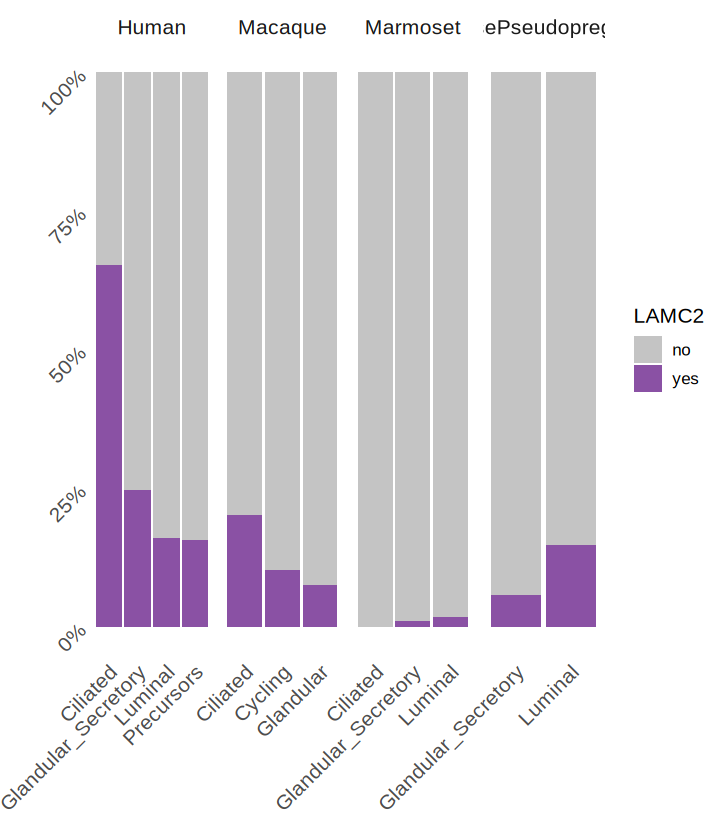

In [13]:
 
  # Stalked barplot 
  ggplot(LAMC2_proportion, mapping = aes(x = Manual_annotation, y = prop, fill =  LAMC2)) + 
    geom_bar(position= "stack", stat = "identity") +
    facet_grid(~ Species,scales = "free_x") + #, scales = "free_x" 
    scale_fill_manual(values = c("grey77","#8A51A4")) + 
    scale_y_continuous(labels = scales::percent) +
    labs(y="", x="") + 
    theme_minimal(base_size = 12) +
    theme(plot.title = element_text(face="bold", 
                                    size = 12,
                                    margin = 20), 
          axis.title = element_text(face ="plain",
                                    size = 12, 
                                    margin = 5),
          axis.text = element_text(face = "plain", 
                                   size = 12, 
                                   angle = 45, hjust = 1),
          strip.text = element_text(face = "plain", 
                                    size = 12),
          panel.grid.minor = element_blank(), 
          panel.grid.major = element_blank())
  
  ggsave("../../../figures/pieces/LAMC2_prop_by_cluster_min0_MousePseudopregnant_v4.pdf", width = 6, height = 7)
  

In [2]:

  #--------------------------------------------
  # CDA 
  ## Extract the proportion of cells 
  
  for (species in c("Macaque","Marmoset","MousePseudopregnant", "Human")) {
    
    if (species =="MousePseudopregnant" | species == "Mouse") {
      gene = "Cda"
      name = species
      sobj = readRDS(file = paste0("../../../results/snRNA-seq/seuratobject/",species,"_processed.rds"))
      DefaultAssay(sobj) = "RNA"
      
      # Collecting normalised CDA expression for each cell
      sobj$CDA_expression = FetchData(sobj, vars = gene, slot = "data")
      
    } else {
      gene = "CDA" 
      name = species
      sobj = readRDS(file = paste0("../../../results/snRNA-seq/seuratobject/",species,"_processed.rds"))
      DefaultAssay(sobj) = "RNA"
      
      # Collecting normalised CDA expression for each cell
      sobj$CDA_expression = FetchData(sobj, vars = gene, slot = "data")
    }
    # Compute the proportion of cells per cluster expression CDA
    CDA_PropCluster = sobj@meta.data %>%  
      mutate(CDA = ifelse(sobj$CDA_expression > 0, "yes", "no")) %>% 
      group_by(Manual_annotation, CDA) %>% 
      summarise(n = n()) %>% 
      group_by(Manual_annotation) %>%
      mutate(prop = n/sum(n)) %>%
      mutate(Species = name)
    assign(paste0(name, "_CDA_Proportion"),CDA_PropCluster)
  }    
  
CDA_proportion = rbind(Human_CDA_Proportion, MousePseudopregnant_CDA_Proportion, Macaque_CDA_Proportion, Marmoset_CDA_Proportion)%>% 
    filter(Manual_annotation != "Stromal" & Manual_annotation != "Lymphoid" & Manual_annotation != "Myometrial" & Manual_annotation != "MUC5B" &  Manual_annotation != "Myeloid" &   Manual_annotation != "Immune" & Manual_annotation != "Myometrium" & Manual_annotation != "Endothelial" )

#   filter(Manual_annotation == "Epithelial Luminal" | Manual_annotation == "Epithelial Glandular-Secretory" | Manual_annotation == "Epithelial Ciliated" | Manual_annotation == "Epithelial proliferating" |Manual_annotation == "Epithelial_Glandular" | Manual_annotation == "Epithelial_Luminal" |Manual_annotation == "Epithelial_glandular" | Manual_annotation == "Epithelial_luminal" | Manual_annotation=="Epithelial_precursors" )
CDA_proportion$Manual_annotation = str_replace(CDA_proportion$Manual_annotation, "_", " ")
CDA_proportion$CDA = as.factor(CDA_proportion$CDA)
CDA_proportion$Manual_annotation = str_remove(CDA_proportion$Manual_annotation, "Epithelial ")
CDA_proportion$Manual_annotation = str_remove(CDA_proportion$Manual_annotation, "-Secretory")
CDA_proportion$Manual_annotation = str_replace(string = CDA_proportion$Manual_annotation, pattern = "proliferating", replacement = "Proliferating")

# Save the table 
write.table(CDA_proportion, file = "../../../results/snRNA-seq/Proportion_EpithelialCell_Expressing_CDA_MousePseudopregnant_v4.tab", sep = "\t")


# Stalked barplot 
ggplot(CDA_proportion, mapping = aes(x = Manual_annotation, y = prop, fill =  CDA)) + 
geom_bar(position= "stack", stat = "identity") +
facet_grid(~ Species,scales = "free_x", space = "free") + #, scales = "free_x" 
scale_fill_manual(values = c("grey77","#8A51A4")) + 
scale_y_continuous(labels = scales::percent) +
labs(y="", x="") + 
theme_minimal(base_size = 12) +
theme(plot.title = element_text(face="bold", 
                                size = 12,
                                margin = 20), 
      axis.title = element_text(face ="plain",
                                size = 12, 
                                margin = 5),
      axis.text = element_text(face = "plain", 
                               size = 12, 
                               angle = 45, hjust = 1),
      strip.text = element_text(face = "plain", 
                                size = 12),
      panel.grid.minor = element_blank(), 
      panel.grid.major = element_blank())

ggsave("../../../figures/pieces/CDA_prop_by_cluster_min0_MousePseudopregnant_v4.pdf", width = 6, height = 7)


ERROR: Error in DefaultAssay(sobj) <- "RNA": could not find function "DefaultAssay<-"
